In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
import platform

plt.rc('font', family = 'Malgun Gothic')

In [71]:
df = pd.read_csv("./file_new/auto-mpg_v2.csv")
df

,연비,실린더,배기량,엔진출력,중량,가속,연식,origin,이름
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [72]:


df = pd.read_csv("./file_new/auto-mpg_v2.csv")
ndf = df[['연비','실린더','배기량','중량']]

In [73]:
# 선형회귀분석 모듈
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
# 다항식으로 변환하는 모듈(2차원으로 변환해서 사용)
from sklearn.preprocessing import PolynomialFeatures

In [75]:
# 예측모델
x = np.array(ndf[['중량']])
y = ndf["연비"]


In [76]:
# train 80%, test 30%로 구분하여 조회
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 10)

In [77]:
poly = PolynomialFeatures(degree = 2)

In [78]:
x_train_poly = poly.fit_transform(x_train)

In [79]:
x_train_poly

array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

In [80]:
pr = LinearRegression()

In [81]:
# 예측
pr.fit(x_train_poly, y_train)

LinearRegression()

In [82]:
# 검증
x_test_poly = poly.fit_transform(x_test)

In [83]:
# 학습시킨 모델에 검증 데이터를 넣어서 결정계수 확인하기
pr.score(x_test_poly, y_test)

0.708700926297548

In [84]:
y_hat_test = pr.predict(x_test_poly)

In [85]:
y_hat_test

array([24.66536039, 26.54410041, 18.98929297, 35.16662957, 15.16790147,
       18.81747781, 16.22268456, 12.13891111, 28.49938194, 29.10996986,
       19.58220208, 18.90655573, 24.66536039, 25.95221677, 14.32710701,
       17.35492396, 23.01149434, 29.74264161, 13.93651453, 14.01775932,
       14.54825345, 32.36444573, 21.06709395, 15.28558567, 17.22850081,
       13.10967497, 16.7150811 , 30.69055618, 20.10211401, 25.34395031,
       20.3420599 , 20.51667773, 25.56444733, 22.09451299, 21.61847493,
       31.37450508, 32.42344474, 20.43293981, 16.73784551, 25.05905632,
       20.50904814, 22.32842989, 30.86039258, 20.36473385, 20.98069295,
       13.04395831, 15.1585788 , 33.74299018, 20.94155617, 30.07438659,
       29.25077822, 13.5126894 , 22.01989315, 14.3956548 , 16.82944872,
       23.61816563, 22.92491785, 30.0854976 , 30.81502786, 24.66536039,
       32.01224181, 26.37515376, 18.28199056, 22.65869766, 25.1821336 ,
       35.0034357 , 12.32397221, 22.6160658 , 20.06493787, 14.94

In [86]:
import matplotlib.pyplot as plt

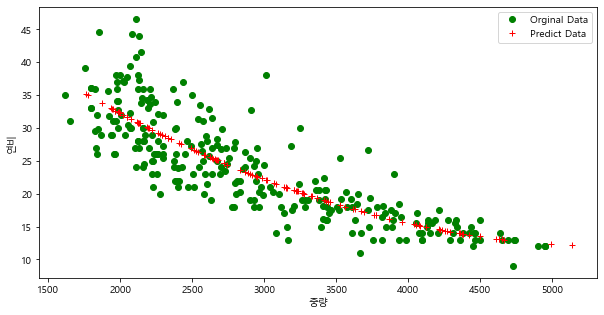

In [87]:
fig= plt.figure(figsize = (10,5))
ax= fig.add_subplot(1, 1, 1)
ax.plot(x_train, y_train, "go", label = "Orginal Data")
ax.plot(x_test, y_hat_test, "r+", label = "Predict Data")



ax.legend(loc="best")

plt.xlabel("중량")
plt.ylabel("연비")

plt.show()

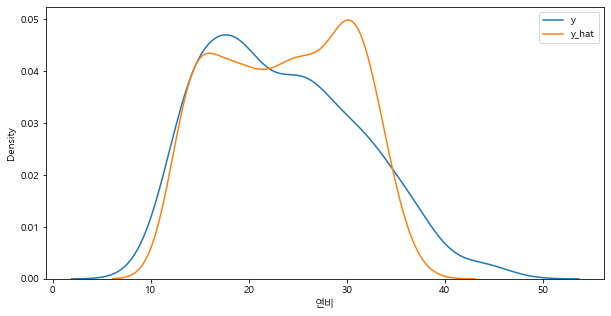

In [88]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)

plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)

plt.legend()
plt.show()